In [1]:
# 기본 오차 막대(errorbar)
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np
plt.style.use("seaborn-whitegrid")

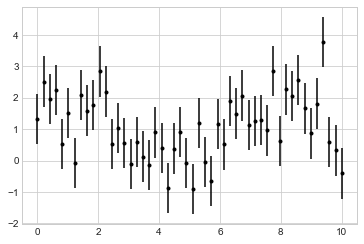

In [2]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy + np.random.randn(50)

# fmt = 선과 점의 모양
# x-error, y-error (수평적, 수직적 오차)
plt.errorbar(x, y, yerr=dy, fmt=".k");

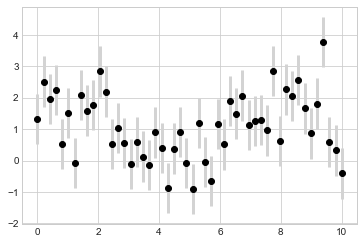

In [3]:
# set errorbar color, linewidth, capsize
plt.errorbar(x, y, yerr=dy, fmt="o", color="black",
             ecolor="lightgray", elinewidth=3, capsize=0);

In [4]:
# 연속 오차
# Gaussian process regression, GPR
# 불확실한 연속 측정치를 가진 데이터에 유여한 비모수 함수를 적합
from sklearn.gaussian_process import GaussianProcess

# 모델을 정의하고 일부 데이터를 그림
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 가우시안 프로세스 적합 계산
gp = GaussianProcess(corr="cubic", theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2 * 시그마 ~ 95% 신뢰 영역

# 결과를 시각화
plt.plot(xdata, ydata, "or")
plt.plot(xfit, yfit, "-", color="gray")

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color="gray", alpha=0.2)
plt.xlim(0,10);

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (C:\Users\Jimmy Son\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\gaussian_process\__init__.py)